In [1]:
import numpy as np
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm

In [ ]:
## línea de visión 
def recta(x_0, y_0, x_1,y_1,x): # todos los puntos son conocidos, la función bota un punto adelante 
    m=(y_1-y_0)/(x_1-x_0)
    recta= y_0+m*(x-x_0)
    
    return recta

def segmentos(array1, array2):  # primero los valores y de la curva
    vect = []
    index = []
    for i in range(0,len(array1)):           
        if (array1-array2)[i] >= 0: #la condicion. 
            vect.append(array1[i])
            index.append(i)
    #    else: 
     #       vect.append(0)
      #      index.append(0)
    return (index, vect)

#### SUPER IMPORTANTE 
def indice_final(array1, array2):  # genera el index final de intersección 
    for i in range(inicio,len(array1)):           
        if (array1-array2)[i] >= 0: #la condicion. 
            indice_final=i
    return indice_final

#funcion para calcular la distancia entre dos puntos 
# p1 y p2 son array de dos dimensiones  que tiene los puntos (x,y)

def distancia(p1, p2): #la entrada     
    resto = p2**2-p1**2
    dist = math.sqrt(abs(resto[0])+ abs(resto[1]))  
    return dist 

    

In [ ]:
class MakeGISObject: 
    #build all the elements and properties of the GIS object

    ## línea de visión 
    def recta(self, x_0, y_0, x_1,y_1,x): # todos los puntos son conocidos, la función bota un punto adelante 
        m=(y_1-y_0)/(x_1-x_0)
        recta= y_0+m*(x-x_0)

        return recta

    def segmentos(array1, array2):  # primero los valores y de la curva
        vect = []
        index = []
        for i in range(0,len(array1)):           
            if (array1-array2)[i] >= 0: #la condicion. 
                vect.append(array1[i])
                index.append(i)
        #    else: 
         #       vect.append(0)
          #      index.append(0)
        return (index, vect)

    #### SUPER IMPORTANTE 
    def indice_final(array1, array2):  # genera el index final de intersección 
        for i in range(inicio,len(array1)):           
            if (array1-array2)[i] >= 0: #la condicion. 
                indice_final=i
        return indice_final

    #funcion para calcular la distancia entre dos puntos 
    # p1 y p2 son array de dos dimensiones  que tiene los puntos (x,y)

    def distancia(self, p1, p2): #la entrada     
        resto = p2**2-p1**2
        dist = math.sqrt(abs(resto[0])+ abs(resto[1]))  
        return dist 

    


    

In [ ]:
cerro_uni = MakeGISObject()

In [ ]:
cerro_uni.recta(5,6, 7, 8, 9)

Luego de definir las funciones, se carga los datos del eje X. Que podrá ser valores reales de posición o índices que ordenan los valores. 

In [ ]:
#array con los valores de X que depende de el número de celdas que tiene la información GIS 
# el valor real debe salir de df_limpio.shape[1]
arr_x = np.linspace(0,625,626)

#array con los valores de X 

Acá ingresa los valores  de la curva real 

In [ ]:
####  Puntos de la curva en este caso es una parabola
#vec_para = []

## creacion y de parábola 
#def parabola(al, bt, gm,x): 
 #   para= al - gm*(x-bt)**2
    
  #  return para


#for i in range(0,len(arr_x)):           
 #   temp=parabola(100,20,0.5,i)
  #  vec_para.append(temp)
#para_vec = np.asarray(vec_para)



## Cargar los datos del raster DEM


In [ ]:
df = pd.read_csv('./rastert_dem_uni1-clean.txt', sep =" ", header=None)
df_filtrado = df.fillna(0)
df_limpio=df.drop(columns=626)#eliminar la última columna 
#df_limpio.head()


print("Dimensiones del dataframe:",df.shape)
print("Número de filas (registros):",df.shape[0])


In [ ]:
#print("Número de columnas:",df_limpio.shape[1])
print("Número de columnas:",df_limpio.shape[1])
type(df_limpio.shape[1])

In [ ]:
#np_array = df_limpio.to_numpy(df_limpio.iloc[100])
# 210 elige la fila que quiero analizar 
np_array = df_limpio.iloc[210].to_numpy()
plt.plot(np_array)
print(len(np_array))
type(np_array)

In [ ]:
#### IMPORTANTE 
inicio = 380 # indice donde quiero empezar a analizar en el eje X 

punto_inicio=[50,120]# punto desde donde se coloca el observador 

####  Puntos de la curva 
# iloc 110 elige la fila que quiero analizar 

np_array = df_limpio.iloc[110].to_numpy()

vec_recta= [] 

#esto genera la recta 
for j in range(0,len(arr_x)):        
    tm=recta(punto_inicio[0],punto_inicio[1],arr_x[inicio], np_array[inicio], arr_x[j]) 
    vec_recta.append(tm)
    recta_vec = np.asarray(vec_recta)  

plt.ylim([70, 250]) # limita el rango en el que se muestra el eje Y
plt.plot(recta_vec) 
plt.plot(np_array)



In [ ]:
len(np_array)
print(arr_x[inicio])
print(np_array[inicio])

In [ ]:
#cálculo de la distancia 
 



lf= indice_final(np_array, recta_vec) # indice final de intersección  # PUNTO 2 P2

int_i= np.asarray([inicio,np_array[inicio]])#convertir los puntos iniciales en el  array  PUNTO DE INICIO P1
int_f= np.asarray([lf,np_array[lf]])#convertir los puntos finales en el  array 
u = distancia(int_i, int_f) #cacula la distancia 
print(u)


## Cargar los datos del flujo de muones simulados

### Distribución de muones atmosféricos en la superficie 

- 12 column format is:
- CorsikaId px py pz x y z shower_id prm_id prm_energy prm_theta prm_phi

In [2]:
datacorsikashw = pd.read_csv('/home/justus/Documentos/cosmicraysuni/CORSIKA_production/c_data/salida_d_2.shw', sep =" ", header=None, skiprows= 6)


#shower = datacorsikashw.fillna(0)
#df_limpio=df.drop(columns=626)#eliminar la última columna 
#df_limpio.head() 

In [3]:
datacorsikashw=datacorsikashw.drop([0])#eliminar la primera fila 

datacorsikashw.head() 

,0,1,2,3,4,5,6,7,8,9,10,11
1,1,-0.000240,-0.000418,0.000522,-51.3171,-2243.32,955.605,1,703,173.277,56.649,-40.194
2,1,0.001533,-0.001168,0.001095,68.3857,-2251.72,955.602,1,703,173.277,56.649,-40.194
3,1,0.001246,-0.000890,0.000890,68.3886,-2246.44,955.604,1,703,173.277,56.649,-40.194
4,1,0.021142,-0.018017,0.017502,55.9525,-2247.98,955.603,1,703,173.277,56.649,-40.194
5,1,0.000648,-0.000565,0.000535,54.4664,-2246.86,955.604,1,703,173.277,56.649,-40.194


In [4]:
#print(datacorsikashw.dtypes)  
muonflux = datacorsikashw[(datacorsikashw[0]== 5) | (datacorsikashw[0]== 6)  ] 

points = len(muonflux)
print(points)


352552


In [5]:
muonflux.head()

,0,1,2,3,4,5,6,7,8,9,10,11
14,6,0.491643,1.449740,1.35508,-2584.330,-1378.260,955.327,2,703,153.0950,46.164,62.932
15,5,0.842015,-0.738108,1.49945,785.195,-3815.400,954.809,3,703,76.5172,32.468,-35.979
17,5,1.609810,-0.522197,2.36266,1318.310,1677.170,955.643,5,703,651.8530,36.313,-29.276
18,6,0.953184,-0.533048,1.96415,-1928.920,489.125,955.689,5,703,651.8530,36.313,-29.276
27,5,0.585618,-0.512812,1.16330,-1824.260,-914.156,955.673,5,703,651.8530,36.313,-29.276


In [6]:
pxpypz=muonflux.iloc[:,[1,2,3]].to_numpy() #seleccion de las colummnas de muones + y - 
type(pxpypz)
print(pxpypz[0])

[0.491643 1.44974  1.35508 ]


In [7]:
muonp2 = []
muoncos = []
muontheta = []
for i in range(0, points, 1):
    p2 = pxpypz[i][0]*pxpypz[i][0]+pxpypz[i][1]*pxpypz[i][1]+pxpypz[i][2]*pxpypz[i][2]
    cos = pxpypz[i][2]/(np.sqrt(p2))
    arcos = (np.arccos(cos))*360/(2*np.pi)
    muonp2.append(p2)
    muoncos.append(cos)
    muontheta.append(arcos)


In [ ]:
 
for i in range(0,10,1):
    print(muontheta[i])

In [ ]:
 
for i in range(0,10,1):
    print(muoncos[i])

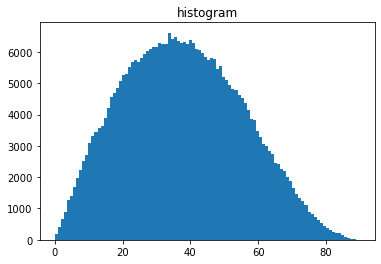

In [20]:
#plt.hist(muontheta, bins = [0,10, 20, 30, 40, 50, 60, 70, 80, 90]) 
num_bins = 100
plt.hist(muontheta, num_bins) 

plt.title("histogram") 
plt.show()

params:  [-0.08139835  0.86364809 12.13622291]
covariance:  [[ 2.38376129e-04 -3.81401808e-03  9.53504521e-03]
 [-3.81401808e-03  6.55534359e-02 -1.88793896e-01]
 [ 9.53504521e-03 -1.88793896e-01  7.79966703e-01]]


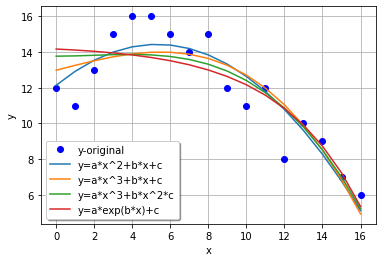

In [18]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

y = array([12, 11, 13, 15, 16, 16, 15, 14, 15, 12, 11, 12, 8, 10, 9, 7, 6])
x = array(range(len(y)))

def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c):
    return a*x**3+b*x+c

def func3(x, a, b, c):
    return a*x**3+b*x**2+c

def func4(x, a, b, c):
    return a*exp(b*x)+c

params, covs = curve_fit(func1, x, y)
print("params: ", params)
print("covariance: ", covs)

params, _ = curve_fit(func1, x, y)
a, b, c = params[0], params[1], params[2]
yfit1 = a*x**2+b*x+c

params, _  = curve_fit(func2, x, y)
a, b, c = params[0], params[1], params[2]
yfit2 = a*x**3+b*x+c

params, _  = curve_fit(func3, x, y)
a, b, c = params[0], params[1], params[2]
yfit3 = a*x**3+b*x**2+c

params, _  = curve_fit(func4, x, y)
a, b, c = params[0], params[1], params[2]
yfit4 = a*exp(x*b)+c

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="y=a*x^2+b*x+c")
plt.plot(x, yfit2, label="y=a*x^3+b*x+c")
plt.plot(x, yfit3, label="y=a*x^3+b*x^2*c")
plt.plot(x, yfit4, label="y=a*exp(b*x)+c")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [ ]:
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, I, n):
    return (I)*np.cos(x)*np.sin(x)


# 3.) Generate exponential and gaussian data and histograms.
#data = np.random.exponential(scale=2.0, size=100)
#data2 = np.random.normal(loc=3.0, scale=0.3, size=100)
bins = np.linspace(0, 90, 352552)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
#data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
#data_entries = data_entries_1 + data_entries_2
#binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, bins_1, muontheta)
print(popt)

plt.hist(muontheta,bins,  label="y-original")
#plt.plot(bins, fit_function, label="y=a*x^2+b*x+c")

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

/home/justus/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.88827207 1.        ]


In [14]:

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

NameError: name 'binscenters' is not defined

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2.) Define fit function.
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) + B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))

# 3.) Generate exponential and gaussian data and histograms.
data = np.random.exponential(scale=2.0, size=100000)
data2 = np.random.normal(loc=3.0, scale=0.3, size=15000)
bins = np.linspace(0, 6, 61)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 4.) Add histograms of exponential and gaussian data.
data_entries = data_entries_1 + data_entries_2
binscenters = np.array([0.5 * (bins[i] + bins[i+1]) for i in range(len(bins)-1)])

# 5.) Fit the function to the histogram data.
popt, pcov = curve_fit(fit_function, xdata=binscenters, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])
print(popt)

# 6.)
# Generate enough x values to make the curves look smooth.
xspace = np.linspace(0, 6, 100000)

# Plot the histogram and the fitted function.
plt.bar(binscenters, data_entries, width=bins[1] - bins[0], color='navy', label=r'Histogram entries')
plt.plot(xspace, fit_function(xspace, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')

# Make the plot nicer.
plt.xlim(0,6)
plt.xlabel(r'x axis')
plt.ylabel(r'Number of entries')
plt.title(r'Exponential decay with gaussian peak')
plt.legend(loc='best')
plt.show()
plt.clf()

### Flujo de muones atmosféricos en la superficie

In [ ]:
datacorsikahst = pd.read_csv('/home/justus/Documentos/cosmicraysuni/CORSIKA_production/c_data/salida.hst', sep =" ", header=None, skiprows= 5)
showerhst=datacorsikahst.drop([157, 158,159, 160, 161, 162])#eliminar la última columna 
showerhst=showerhst.drop(columns=14)#eliminar la última columna 
 
showerhst

In [ ]:
muonshower=showerhst.drop([0])#eliminar la primera fila 
muonshower[0] = muonshower[0].astype(float) 
muonshower[4] = muonshower[4].astype(float) 
muonshower[5] = muonshower[5].astype(float) 
muonshower[13] = muonshower[13].astype(float) 
 

In [ ]:
 

# we make a plot of the results for each offset
fig, ax = plt.subplots()
colors = ["crimson", "dodgerblue"]
    

muonshower.plot(ax=ax, kind = 'scatter', x=0, y=5, color = "green", label="muon+")
muonshower.plot(ax=ax, kind = 'scatter', x=0, y=4, color="red", label="muon-")
muonshower.plot(ax=ax, kind = 'scatter', x=0, y=13, color="blue", label="total")

plt.xlabel("Energy (GeV)")
plt.ylabel("Flux")
plt.legend()
        
        
plt.xscale("log")
plt.yscale("log")
plt.show()

#### Convertir en numpy un conjunto de datos

In [ ]:


#energymuon=muonshower.iloc[:,[0,4,5,13]].to_numpy() #seleccion de las colummnas de muones + y - 


### Links revisados

- https://datatofish.com/convert-string-to-float-dataframe/
- https://www.w3schools.com/python/pandas/pandas_plotting.asp
- https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values
- https://www.tutorialspoint.com/numpy/numpy_histogram_using_matplotlib.htm#:~:text=NumPy%20has%20a%20numpy.,variable%20height%20corresponding%20to%20frequency.
- https://riptutorial.com/scipy/example/31081/fitting-a-function-to-data-from-a-histogram
- https://riptutorial.com/scipy/example/31081/fitting-a-function-to-data-from-a-histogram